# 🍽️ Mining Themes in Food Safety & Fair Grading of Restaurants

### Here we explore inspection data to uncover **common themes in food safety violations** and use **statistics to fairly grade restaurants**.
---

## ⚠️ Watch out for:
- Some of the **most interesting patterns** come from **extreme values**.
- But those can often be misleading, usually the result of **small sample sizes**.
---

> 🥷 Our secret weapon 🥷

> We can use statistics to account for the **uncertainty** in our estimates, enabling more truthful and fair grading of food safety.


# My file path is kept secret in a .env file since we are posting this online

In [1]:
import pandas as pd
from dotenv import load_dotenv
import os
load_dotenv()
myfilepath=os.getenv("FoodPath")
df=pd.read_csv(myfilepath)

In [2]:
df

,X,Y,OBJECTID,HealthFacilityIDNumber,FacilityCategory,BusinessName,RiskLevel,FullAddress,AddrNum,AddrNumSuffix,...,ViolationPoints,InspectionScore,ViolationIDNumber,APN,Ward,Neighborhood,Latitude,Longitude,X_WebMercator,Y_WebMercator
0,-1.038262e+07,5.613280e+06,1,LIC388576,RESTAURANT,KILIMANJARO ENTERPRISES,1,3021 5TH AVE S,3021.0,NaN,...,0,94,-1,0302824110235,8.0,Central,44.94763,-93.26868,-1.038262e+07,5.613280e+06
1,-1.038262e+07,5.613280e+06,2,LIC388576,RESTAURANT,KILIMANJARO ENTERPRISES,1,3021 5TH AVE S,3021.0,NaN,...,0,94,801398,0302824110235,8.0,Central,44.94763,-93.26868,-1.038262e+07,5.613280e+06
2,-1.038262e+07,5.613280e+06,3,LIC388576,RESTAURANT,KILIMANJARO ENTERPRISES,1,3021 5TH AVE S,3021.0,NaN,...,0,94,801399,0302824110235,8.0,Central,44.94763,-93.26868,-1.038262e+07,5.613280e+06
3,-1.038262e+07,5.613280e+06,4,LIC388576,RESTAURANT,KILIMANJARO ENTERPRISES,1,3021 5TH AVE S,3021.0,NaN,...,2,94,801402,0302824110235,8.0,Central,44.94763,-93.26868,-1.038262e+07,5.613280e+06
4,-1.038262e+07,5.613280e+06,5,LIC388576,RESTAURANT,KILIMANJARO ENTERPRISES,1,3021 5TH AVE S,3021.0,NaN,...,0,94,801403,0302824110235,8.0,Central,44.94763,-93.26868,-1.038262e+07,5.613280e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39993,-1.038809e+07,5.607778e+06,39994,LIC413942,RESTAURANT,"TONO MINNEAPOLIS, LLC",2,3000 50TH ST W,3000.0,NaN,...,0,80,-1,1702824130192,13.0,Fulton,44.91263,-93.31783,-1.038809e+07,5.607778e+06
39994,-1.038809e+07,5.607778e+06,39995,LIC413942,RESTAURANT,"TONO MINNEAPOLIS, LLC",2,3000 50TH ST W,3000.0,NaN,...,0,80,-1,1702824130192,13.0,Fulton,44.91263,-93.31783,-1.038809e+07,5.607778e+06
39995,-1.038160e+07,5.623637e+06,39996,LIC420060,INSTITUTION,LUCKY CHILD CARE LLC,1,525 LOWRY AVE NE,525.0,NaN,...,4,96,905326,1102924240079,1.0,Holland,45.01344,-93.25950,-1.038160e+07,5.623637e+06
39996,-1.038434e+07,5.611129e+06,39997,LIC45640,RESTAURANT,RINCON 38,1,3801 GRAND AVE S,3801.0,NaN,...,0,64,-1,1002824220115,8.0,King Field,44.93395,-93.28407,-1.038434e+07,5.611129e+06


#### Which neighborhoods have the highest avg inspection scores?

<Axes: ylabel='Neighborhood'>

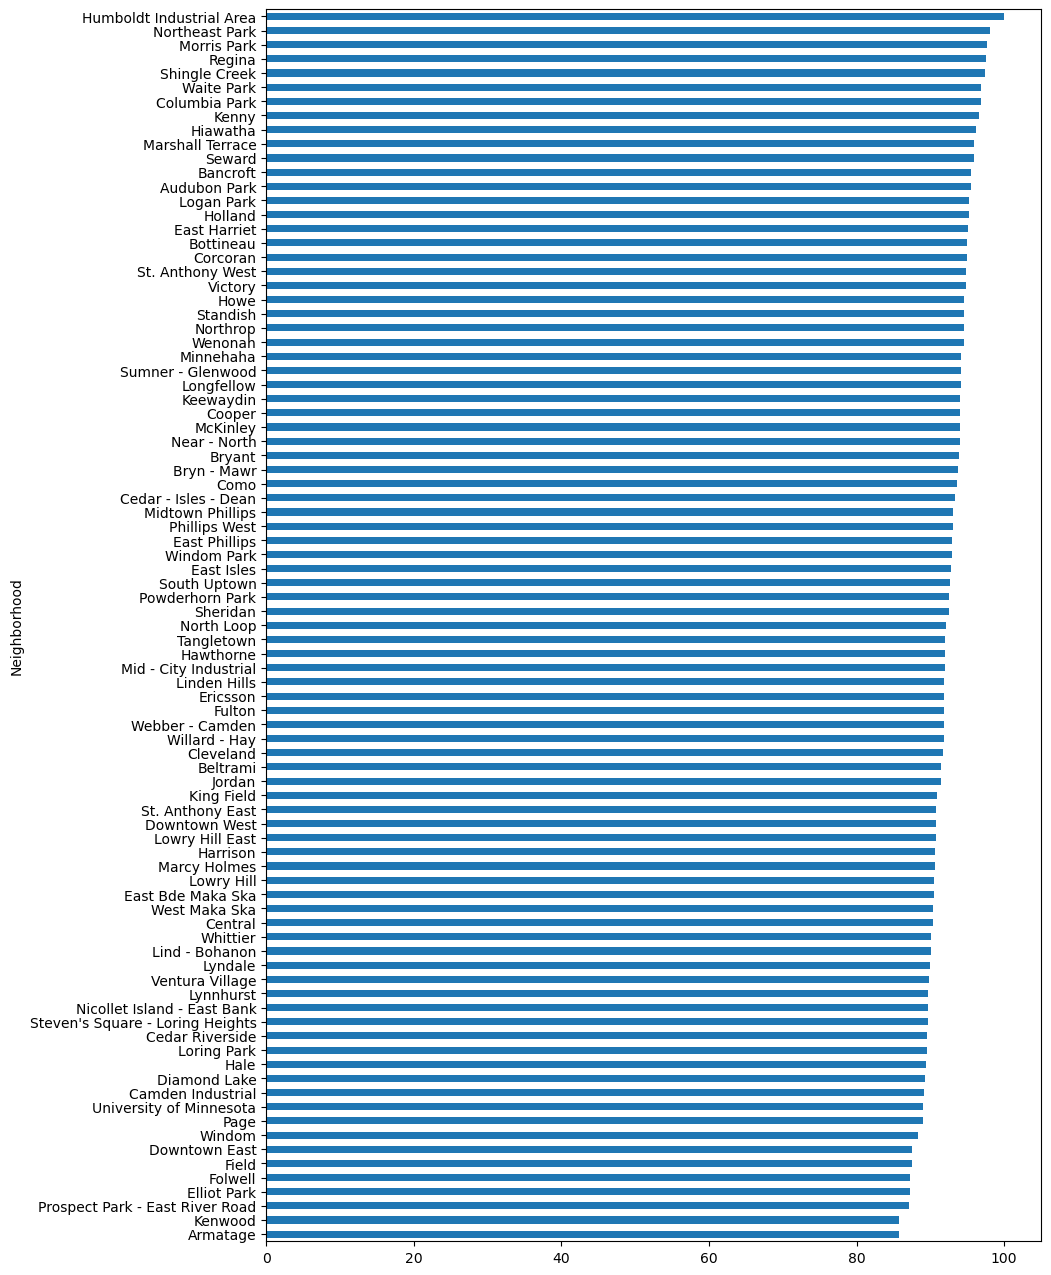

In [3]:
df.groupby('Neighborhood')['InspectionScore'].mean().sort_values().plot(kind='barh',figsize=(10,16))

#### Question: Does Kenwood have enough inspected locations to trust its score?

<Axes: ylabel='Neighborhood'>

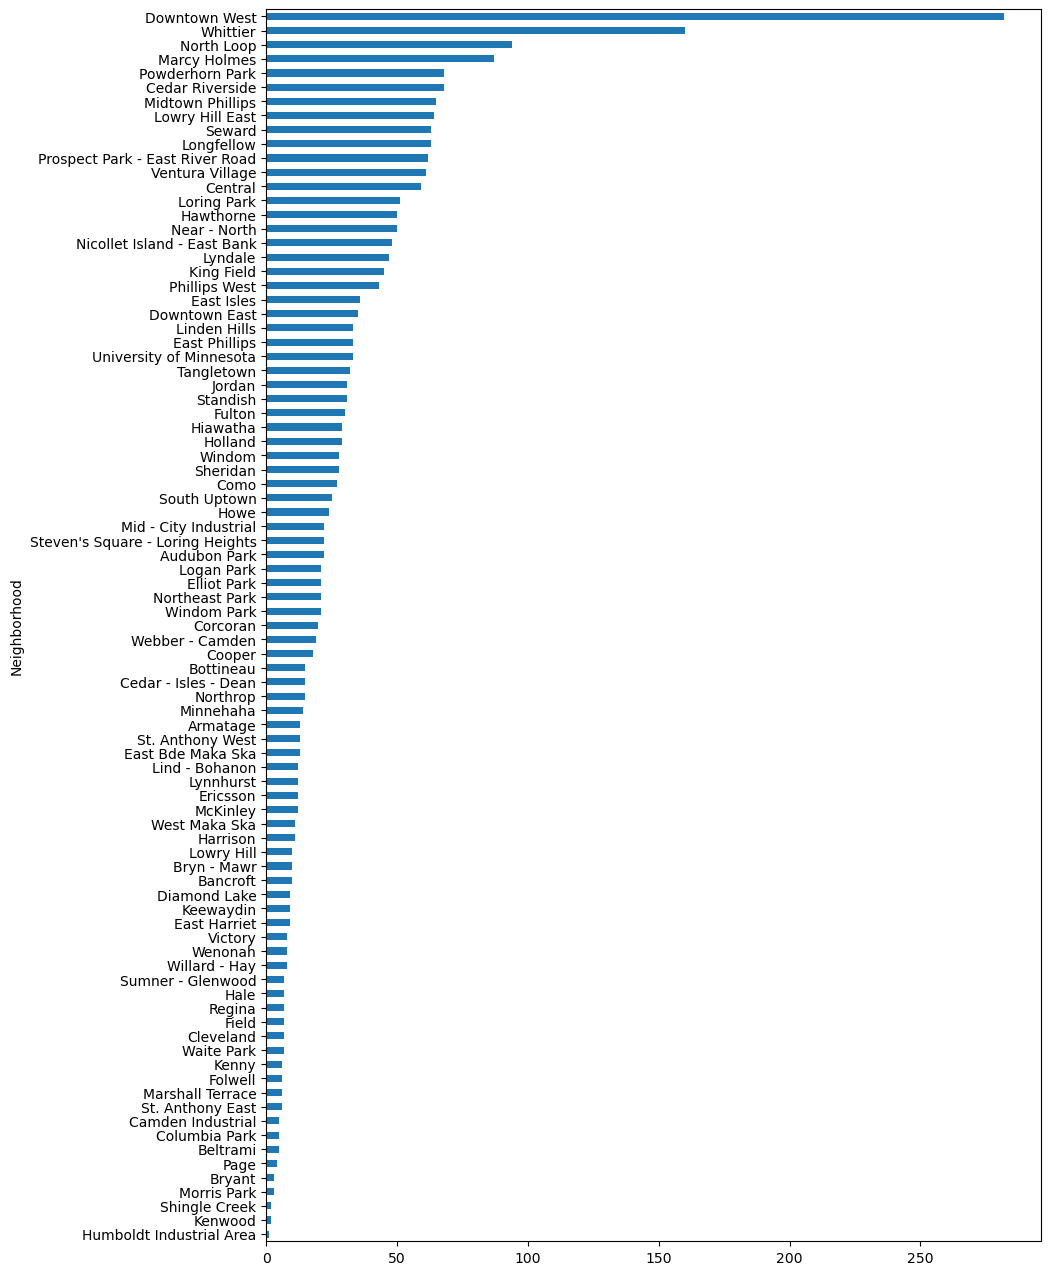

In [4]:
df.groupby(['Neighborhood','BusinessName']).size().reset_index()['Neighborhood'].value_counts().sort_values().plot(kind='barh',figsize=(10,16))

### Answer: No

#### Is there an inverse law of large numbers?

In [5]:
skew=[]# make an empty list
for i in range(1000): # pick values 0-999
    skew.append(df.sample(i)['InspectionScore'].mean()) # randomly sample i values from our dataframe

<Axes: title={'center': 'Estimated AVG InspectionScore As Sample Size Increases'}>

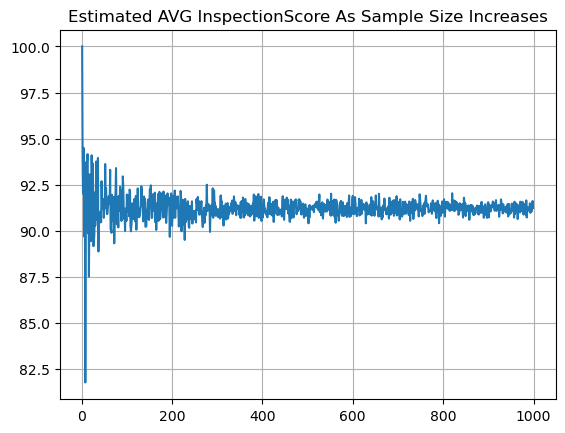

In [6]:
pd.Series(skew).plot(title='Estimated AVG InspectionScore As Sample Size Increases',grid=True)

# See how with a small sample size the estimated mean is all over the place, but as sample size increases our estimate converges?

#### Which business have the lowest avg inspection score?

In [7]:
df.groupby(['BusinessName'])['InspectionScore'].mean().sort_values().head(10)

BusinessName
PAUL'S BOBBY & STEVE'S AUTO WORLD    68.909091
O & O LLC                            70.000000
DILLA'S ETHIOPIAN RESTAURANT         74.407407
SIDEWALK KITCHEN                     75.050000
BREAD & PICKLE                       75.219512
TACO LOCOS BURRITOS & MORE           75.424658
GOBEEY CAFE #198                     75.428571
ALLE AAMIN COFFEE SHOP               75.828571
RINCON 38                            76.000000
BOOK CLUB                            76.400000
Name: InspectionScore, dtype: float64

#### Are my tapas actually unsafe? 

In [8]:
df.query('BusinessName=="RINCON 38"')

,X,Y,OBJECTID,HealthFacilityIDNumber,FacilityCategory,BusinessName,RiskLevel,FullAddress,AddrNum,AddrNumSuffix,...,ViolationPoints,InspectionScore,ViolationIDNumber,APN,Ward,Neighborhood,Latitude,Longitude,X_WebMercator,Y_WebMercator
26498,-1.038434e+07,5.611129e+06,26499,LIC45640,RESTAURANT,RINCON 38,1,3801 GRAND AVE S,3801.0,NaN,...,0,88,-1,1002824220115,8.0,King Field,44.93395,-93.28407,-1.038434e+07,5.611129e+06
39996,-1.038434e+07,5.611129e+06,39997,LIC45640,RESTAURANT,RINCON 38,1,3801 GRAND AVE S,3801.0,NaN,...,0,64,-1,1002824220115,8.0,King Field,44.93395,-93.28407,-1.038434e+07,5.611129e+06


In [9]:
df['Date']=pd.to_datetime(df.DateOfInspection.astype(str).str.split(' ').str[0])

#### Which businesses have the most health code violations?

In [10]:
df['BusinessName'].value_counts().head(10)

BusinessName
GOLDERN FINGERS                      171
SUBWAY                               163
BOLUDO                               157
BONCHON DINKY                        138
GOOD DEAL ORIENTAL FOODS             130
DONG HAE KOREAN GRILL & SUSHI LLC    126
BLOOMINGTON MARKET LLC               125
LEGENDARY SPICE                      116
EAST VILLAGE GRILL                   113
BURRITO LOCO                         110
Name: count, dtype: int64

<Axes: title={'center': 'BONCHON DINKY Health Violations Trend'}, xlabel='Date'>

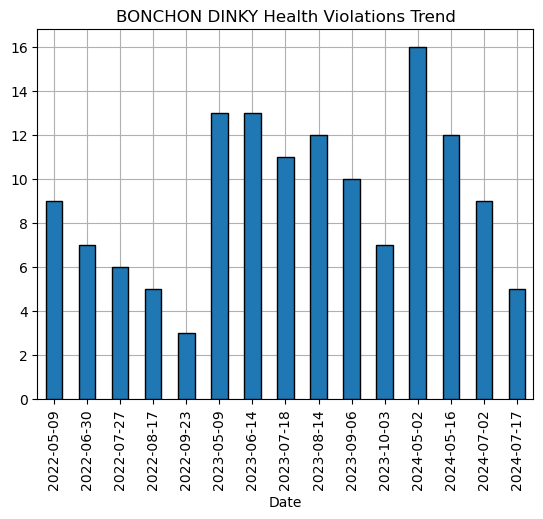

In [11]:
df[df['BusinessName']=="BONCHON DINKY"]['Date'].astype(str).value_counts().sort_index().plot(kind='bar',edgecolor='black',grid=True,zorder=3,title='BONCHON DINKY Health Violations Trend')

<Axes: title={'center': 'DONG HAE KOREAN GRILL & SUSHI LLC Health Violations Trend'}, xlabel='Date'>

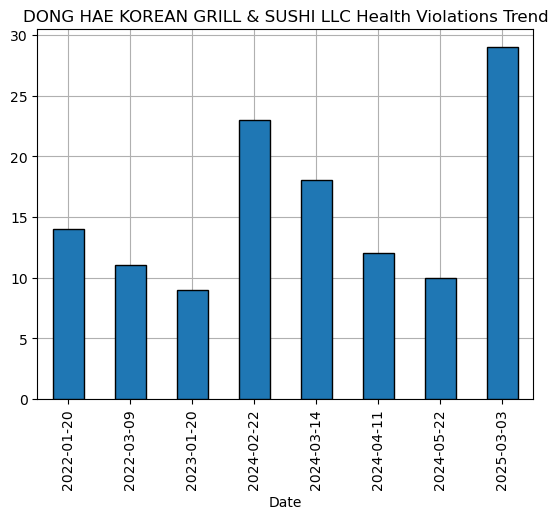

In [12]:
df[df['BusinessName']=="DONG HAE KOREAN GRILL & SUSHI LLC"]['Date'].astype(str).value_counts().sort_index().plot(kind='bar',edgecolor='black',grid=True,zorder=3,title='DONG HAE KOREAN GRILL & SUSHI LLC Health Violations Trend')